In [1]:
import numpy as np
import sewpy
import aplpy
import astropy.units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
import aplpy
from astropy.io import fits

plt.xkcd()

%matplotlib inline

/scratch/home/rwibowo/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
def runsextractor(image_file, detect_thresh=3.5, analysis_thresh=3.0):
    params = ['NUMBER', 'FLUX_ISO', 'FLUXERR_ISO', 'FLUX_AUTO', 'FLUXERR_AUTO', 'FLUX_BEST', 'FLUXERR_BEST', 'BACKGROUND', 
              'THRESHOLD', 'FLUX_MAX', 'XMAX_IMAGE', 'YMAX_IMAGE', 'XPEAK_IMAGE', 'YPEAK_IMAGE', 'ALPHAPEAK_J2000', 
              'DELTAPEAK_J2000', 'X_IMAGE', 'Y_IMAGE', 'ALPHA_SKY', 'DELTA_SKY', 'ALPHA_J2000', 'DELTA_J2000']

    config = {"DETECT_THRESH":detect_thresh, "ANALYSIS_THRESH":analysis_thresh}

    sew = sewpy.SEW(params=params, config=config)

    out = sew(image_file)
    data = out["table"]
    
    ra, dec, flux, label = data['ALPHA_J2000'], data['DELTA_J2000'], data['FLUX_MAX'], data['NUMBER'].astype('int')
    
    return ra, dec, flux, label

In [3]:
imgfile = "./images/aftersubstract.fits"

In [4]:
ra, dec, flux, label = runsextractor(imgfile)

Ouch, SExtractor complains :
b''


In [5]:
ra

174.7892325
174.7922551
174.7945927
174.7957895
174.7954746


In [6]:
#rms = 1.92070720004e-05
#rms = 1.92046941265e-05
rms = 3.8e-05
c = SkyCoord('11h39m10.702595s -13d50m43.63856s', unit=(u.hourangle, u.deg), frame='icrs')
center_x, center_y = [c.ra.value, c.dec.value]

PB = 58./3600.0 



multp = np.array([4, 10, 50, 100, 500, 1000])
lvl = rms*multp

INFO: Setting slices=[0, 0] [aplpy.core]


indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in param

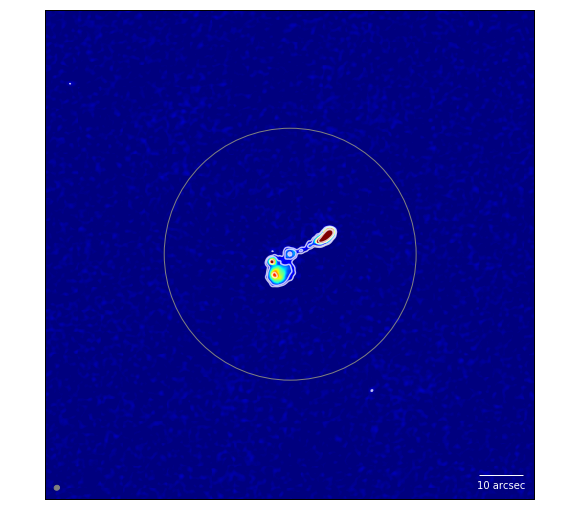

In [7]:
image = aplpy.FITSFigure(imgfile)#, figsize=(10, 10), dpi=300)

image.show_colorscale(vmin=0, vmax=0.0025)
#image.show_colorscale(vmin=0)
#image.show_colorbar()
image.tick_labels.set_font(size='small')
image.show_contour(colors='white', levels=lvl, alpha=0.75)
image.hide_xaxis_label()
image.hide_yaxis_label()
image.hide_tick_labels()

image.add_beam()
image.beam.set_color('gray')
image.add_scalebar(10 * u.arcsecond)
image.scalebar.set_label('10 arcsec')
image.scalebar.set_color("white")

#image.show_markers(center_x, center_y, marker='*', edgecolor="white", facecolor="none", s=100)

#marker_size =  100
#image.show_markers(ra, dec, edgecolor='white', facecolor='none', marker='o', s=marker_size, alpha=0.4)

# primary beam circle
image.show_circles(center_x, center_y, PB/2.0, edgecolor='gray', facecolor="none")

#image.set_title("J1139-1350 in B3")

# for i, lbl in enumerate(label):
#     image.add_label(ra[i], dec[i]-0.0004, lbl)

#image.add_label(ra[i], dec[i]-0.0004, "J1139-1350 in B3")

In [8]:
image.savefig("J1139_aftersubstract.png", dpi=300, transparent=True)